In [1]:
#Importing Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


### Scalling

In [3]:
# scalling 


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
    r"C:\\work_files\\projects\\Hot_dogs\\data\\train",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
    r"C:\\work_files\\projects\\Hot_dogs\\data\\val",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')


test_generator = test_datagen.flow_from_directory(
    r"C:\\work_files\\projects\\Hot_dogs\\data\\test",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')


Found 3098 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### Convolution and Maxpooling

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='softmax'),
    MaxPooling2D(pool_size=(2, 2))])


### Flattening

In [5]:
#flattening
model.add(Flatten())

### Neural Network Connection

In [6]:
#Neural Network connection
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Model Compiling

In [7]:
# model compiling
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Model Fitting

In [8]:
# Model fitting
model.fit(
    train_generator,
    steps_per_epoch=8000 // 32,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=2000 // 32
)


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 285ms/step - accuracy: 0.5181 - loss: 0.6907 - val_accuracy: 0.5000 - val_loss: 0.7154
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.6393 - loss: 0.6320 - val_accuracy: 0.5000 - val_loss: 0.6965
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 112ms/step - accuracy: 0.6858 - loss: 0.5882 - val_accuracy: 0.5000 - val_loss: 0.7048
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 122ms/step - accuracy: 0.6967 - loss: 0.5673 - val_accuracy: 0.5000 - val_loss: 0.6534
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.7208 - loss: 0.5466 - val_accuracy: 0.7500 - val_loss: 0.5807
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 147ms/step - accuracy: 0.7313 - loss: 0.5332 - val_accuracy: 0.6000 - val_loss: 0.6048
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 151ms/step - accuracy: 0.7384 - loss: 0.5265 - val_accuracy: 0.6500 - val_loss: 0.5639
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 155ms/step - accuracy: 0.7352 - loss: 0

### Evolution

In [9]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_generator, steps=2000 // 32)
train_loss, train_acc = model.evaluate(train_generator, steps=2000 // 32)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)
# Save the Model
model.save('Hot_dogs_CNN.h5')

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7656 - loss: 0.5320  
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.8437 - loss: 0.3565


Test accuracy: 0.7649999856948853
Train accuracy: 0.8230846524238586


### Model Loading

In [20]:
# Load the trained model
model = load_model('Hot_dogs_CNN.h5')

## Model Summary

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,331 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Testing with random Image

In [26]:
# Test with a random image
img_path=r"C:\Users\manju\Downloads\hot_dog.jpeg"

### Random Image Preprocessing

In [27]:
# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image to [0, 1]
    return img_array


### Prediction

In [28]:
# Prediction
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    if prediction[0] < 0.5:
        print("It's a hotdog!")
    else:
        print("It's not a hotdog!")
    return prediction

In [29]:
prediction = predict_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
It's a hotdog!


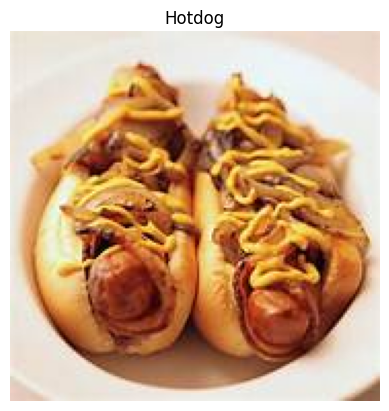

In [30]:
# Display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title("Hotdog" if prediction[0] < 0.5 else "Not Hotdog")
plt.axis('off')
plt.show()